In [1]:
# Import packages
import pandas as pd
import numpy as np
from pandas_datareader import wb 

In [3]:
# Download data on refugee population in a country from the World Bank database
refugeesin_wb = wb.download(indicator='SM.POP.REFG', country = 'all', start=1990, end=2017)
refugeesin_wb = refugeesin_wb.reset_index()


In [4]:
# Clean data (deleting regions, keeping countries)
refugeesin_wb.loc[refugeesin_wb.country == 'Afghanistan']
refugeesin_wb = refugeesin_wb.iloc[1316:,]
refugeesin_wb = refugeesin_wb.reset_index()
refugeesin_wb = refugeesin_wb.drop('index', axis = 1)


In [5]:
# Check unique countries to compare with other data set, rename columns
len(refugeesin_wb.country.unique())
refugeesin_wb = refugeesin_wb.rename(columns = {'country':'Country','year':'Year','SM.POP.REFG':'Refugee population in country'})
refugeesin_wb.head(3)

,Country,Year,Refugee population in country
0,Afghanistan,2017,75927.0
1,Afghanistan,2016,59771.0
2,Afghanistan,2015,257554.0


In [6]:
#Download data on refugee population by country of origin from the World Bank database
refugeesout_wb = wb.download(indicator='SM.POP.REFG.OR', country = 'all', start=1990, end=2017)
refugeesout_wb = refugeesout_wb.reset_index()


In [7]:
# Clean data (deleting regions, keeping countries)
refugeesout_wb.loc[refugeesout_wb.country == 'Afghanistan']
refugeesout_wb = refugeesout_wb.iloc[1316:,]
refugeesout_wb = refugeesout_wb.reset_index()
refugeesout_wb = refugeesout_wb.drop('index', axis = 1)


In [8]:
# Check unique countries to compare with other data set, rename columns
len(refugeesout_wb.country.unique())
refugeesout_wb = refugeesout_wb.rename(columns = {'country':'Country','year':'Year','SM.POP.REFG.OR':'Refugee population outside of country'})
refugeesout_wb.head(3)

,Country,Year,Refugee population outside of country
0,Afghanistan,2017,2624225.0
1,Afghanistan,2016,2501445.0
2,Afghanistan,2015,2666305.0


In [9]:
# Join the datasets
refugees_wb = pd.merge(refugeesin_wb,refugeesout_wb,how='outer',on=['Country','Year'])


In [10]:
# Change data type of year to integer
refugees_wb['Year'] = refugees_wb['Year'].astype(int)
refugees_wb.dtypes


Country                                   object
Year                                       int64
Refugee population in country            float64
Refugee population outside of country    float64
dtype: object

In [11]:
# Calculate refugee net population
refugees_wb['Net refugee population'] = refugees_wb['Refugee population in country']-refugees_wb['Refugee population outside of country']
refugees_wb


,Country,Year,Refugee population in country,Refugee population outside of country,Net refugee population
0,Afghanistan,2017,75927.0,2624225.0,-2548298.0
1,Afghanistan,2016,59771.0,2501445.0,-2441674.0
2,Afghanistan,2015,257554.0,2666305.0,-2408751.0
3,Afghanistan,2014,300423.0,2596270.0,-2295847.0
4,Afghanistan,2013,16863.0,2556502.0,-2539639.0
5,Afghanistan,2012,16187.0,2586152.0,-2569965.0
6,Afghanistan,2011,3009.0,2664436.0,-2661427.0
7,Afghanistan,2010,6434.0,3054709.0,-3048275.0
8,Afghanistan,2009,37.0,2887123.0,-2887086.0
9,Afghanistan,2008,37.0,2833128.0,-2833091.0


In [12]:
# Import packages
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as ticker
import ipywidgets as widgets


In [13]:
# Show net refugee population over the years with country dropdown menu
def interactive_development(refugees_wb, Country):
    
    # a. Calculations
    I = refugees_wb['Country'] == Country
    
    # b. Plot
    ax=refugees_wb.loc[I,:].plot.bar(x='Year', y='Net refugee population', style='-o', legend=None, color=(0.2, 0.4, 0.6, 0.6)) 
    ax.get_yaxis().get_major_formatter().set_scientific(False)
    plt.gca().invert_xaxis()
    ax.set_title("Net Refugee Population by Country")
    ax.set_ylabel("Net Refugee Population")

widgets.interact(interactive_development, 
    refugees_wb = widgets.fixed(refugees_wb),
    Country = widgets.Dropdown(description='Country', options=refugees_wb.Country.unique(), value='Afghanistan')
)

interactive(children=(Dropdown(description='Country', options=('Afghanistan', 'Albania', 'Algeria', 'American …

<function __main__.interactive_development(refugees_wb, Country)>

In [14]:
# Looking at different countries, wee see different patterns. 
# Looking at European countries, e.g. Germany, we see a large net refugee population in the 1990's, which is due to the breakdown of Yugoslavia, followed by a decreasing net refugee population in the 2000's and an increasing net refugee population again following the refugee crisis in 2015 and the following years.
# Looking at e.g. Bosnia and Hercegovina, we see the opposite side of this story with a very negative net refugee population in the 1990's and a net refugee population of around 0 today.
# Looking at Middle Eastern countries, e.g. Jordan, we see that over the entire period there has been a positive net refugee population, but it was not large during the 1990's. However, it has grown steadily up until 2017, especially due to the war in Syria.
# Looking at Syria gives us the opposite side of this story with a net refugee population of around 0 up until 2005 followed by a period with a small positive net refugee population and then in 2011 onwards - the war years - a significantly negative net refugee population.

# We will focus on the most recent refugee crisis following espcecially the Syrian war and will thus restrict our data set to the years 2013-2017.


In [15]:
refugees_wb = refugees_wb[refugees_wb['Year'] > 2012]
refugees_wb

,Country,Year,Refugee population in country,Refugee population outside of country,Net refugee population
0,Afghanistan,2017,75927.0,2624225.0,-2548298.0
1,Afghanistan,2016,59771.0,2501445.0,-2441674.0
2,Afghanistan,2015,257554.0,2666305.0,-2408751.0
3,Afghanistan,2014,300423.0,2596270.0,-2295847.0
4,Afghanistan,2013,16863.0,2556502.0,-2539639.0
28,Albania,2017,89.0,12163.0,-12074.0
29,Albania,2016,138.0,11065.0,-10927.0
30,Albania,2015,104.0,10408.0,-10304.0
31,Albania,2014,104.0,10158.0,-10054.0
32,Albania,2013,93.0,10103.0,-10010.0


In [16]:
# Group by country and summarize over all years
refugees_grouped = refugees_wb.drop('Year', axis=1)
refugees_grouped = refugees_grouped.groupby('Country').mean()
refugees_grouped = refugees_grouped.reset_index()
refugees_grouped

,Country,Refugee population in country,Refugee population outside of country,Net refugee population
0,Afghanistan,1.421076e+05,2588949.40,-2.446842e+06
1,Albania,1.056000e+02,10779.40,-1.067380e+04
2,Algeria,9.418700e+04,3678.20,9.050880e+04
3,American Samoa,NaN,NaN,NaN
4,Andorra,NaN,4.75,NaN
5,Angola,2.229520e+04,9662.00,1.263320e+04
6,Antigua and Barbuda,9.500000e+00,67.00,-6.000000e+01
7,Argentina,3.329400e+03,227.80,3.101600e+03
8,Armenia,1.730800e+04,11309.00,5.999000e+03
9,Aruba,1.333333e+00,NaN,NaN


In [17]:
# Show bottom 10 net refugee population countries
ascending_NI = refugees_grouped.sort_values('Net refugee population')
ascending_NI.head(10)

,Country,Refugee population in country,Refugee population outside of country,Net refugee population
189,Syrian Arab Republic,611602.6,4612412.4,-4000809.8
0,Afghanistan,142107.6,2588949.4,-2446841.8
176,Somalia,7872.8,1070007.8,-1062135.0
178,South Sudan,257343.0,1077197.2,-819854.2
37,Central African Republic,10296.8,434480.6,-424183.8
61,Eritrea,2669.4,404875.2,-402205.8
42,Colombia,232.2,319962.2,-319730.0
185,Sudan,415076.0,657428.4,-242352.4
44,"Congo, Dem. Rep.",321048.2,543215.6,-222167.4
31,Burundi,54322.2,257053.8,-202731.6


In [18]:
# Show top 10 of net refugee population countries
descending_NI = refugees_grouped.sort_values('Net refugee population', ascending=False)
descending_NI.head(10)

,Country,Refugee population in country,Refugee population outside of country,Net refugee population
99,Jordan,2809918.2,1844.6,2808073.6
198,Turkey,2217679.0,61857.6,2155821.4
213,West Bank and Gaza,2104365.8,97731.0,2006634.8
110,Lebanon,1476915.2,4497.6,1472417.6
149,Pakistan,1485777.2,183372.0,1302405.2
91,"Iran, Islamic Rep.",955537.6,90980.0,864557.6
202,Uganda,674917.0,6857.0,668060.0
64,Ethiopia,702114.8,84237.0,617877.8
101,Kenya,504636.2,8025.4,496610.8
73,Germany,472087.8,130.4,471957.4


In [19]:
# Create country filter
country_filter = refugees_wb.Country.isin(['Germany', 'Denmark', 'Uganda', 'Jordan', 'Turkey'])
refugees = refugees_wb[country_filter].set_index('Year')
refugees

,Country,Refugee population in country,Refugee population outside of country,Net refugee population
Year,,,,
2017,Denmark,35593.0,NaN,NaN
2016,Denmark,33507.0,2.0,33505.0
2015,Denmark,27326.0,9.0,27317.0
2014,Denmark,17785.0,12.0,17773.0
2013,Denmark,13170.0,10.0,13160.0
2017,Germany,970302.0,66.0,970236.0
2016,Germany,669482.0,74.0,669408.0
2015,Germany,316115.0,161.0,315954.0
2014,Germany,216973.0,176.0,216797.0


Text(0.5, 1.0, 'Net refugee population per Country')

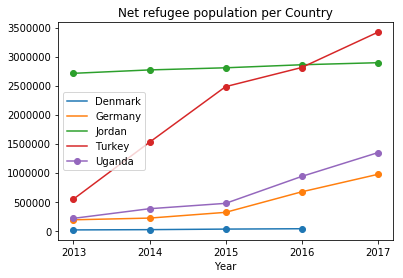

In [20]:
# Create graphic overview of net inflow in chosen countries (kan ikke få x-aksen til at være hele år)
fix,ax = plt.subplots()
plt.xticks(np.arange(2013, 2018, step=1.0))
ax = refugees.groupby('Country')['Net refugee population'].plot(style='-o', legend='False')
plt.title('Net refugee population per Country')


In [21]:
# In the following part we wish to examine the origin of the asylum seekers in the countries of interest from the previous part, respectively Jordan, Uganda, Germany, Turkey and Denmark in the years 2013-2017
# Due to the lack of data over asylum seekers in Uganda and Jordan, these countries will be left out
import os 
os.listdir('./dataproject/')
filename = "./dataproject/Refugees.csv"

refug = pd.read_csv("./dataproject/Refugees.csv", low_memory=False, skiprows = 3, skipinitialspace=True)
refug.head(10)

,Country / territory of asylum/residence,Origin,Year,Month,Value
0,Australia,Afghanistan,1999.0,January,8
1,Australia,Afghanistan,1999.0,February,10
2,Australia,Afghanistan,1999.0,March,25
3,Australia,Afghanistan,1999.0,April,25
4,Australia,Afghanistan,1999.0,May,7
5,Australia,Afghanistan,1999.0,June,24
6,Australia,Afghanistan,1999.0,July,30
7,Australia,Afghanistan,1999.0,August,15
8,Australia,Afghanistan,1999.0,September,10
9,Australia,Afghanistan,1999.0,October,88


In [22]:
# Rename columns
refug.rename(columns = {'Country / territory of asylum/residence': 'Country', 'Value': 'Asylum Seekers'}, inplace=True)


In [23]:
# Germany 
country_filter = refug.Country.isin(['Germany'])
Germany=refug[country_filter]

In [24]:
# Remove all non-numeric values from "Value" column
Germany['Asylum Seekers'] = pd.to_numeric(refug['Asylum Seekers'], errors='coerce')


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [25]:
# Drop all rows with Null values 
Germany = Germany.dropna(subset=['Asylum Seekers'])


In [26]:
# Group data
Germany_grouped = Germany.drop(['Year','Month'], axis=1)
Germany_grouped = Germany_grouped.groupby(['Country', 'Origin', 'Asylum Seekers']).sum()
Germany_grouped = Germany.groupby(['Origin'])['Asylum Seekers'].sum()
Germany_grouped = Germany.groupby(['Origin'], as_index=False).agg({'Asylum Seekers':'sum'})


In [27]:
# Sort data
Germanytop10 = Germany_grouped.sort_values('Asylum Seekers', ascending=False)
Germanytop10.rename(columns = {'Origin':'Origin of Asylum Seekers in Germany'}, inplace=True)

In [28]:
# Denmark
country_filter = refug.Country.isin(['Denmark'])
Denmark=refug[country_filter]


In [29]:
# Remove all non-numeric values from "Value" column
Denmark['Asylum Seekers'] = pd.to_numeric(refug['Asylum Seekers'], errors='coerce')


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [30]:
# Drop all rows with Null values 
Denmark = Denmark.dropna(subset=['Asylum Seekers'])


In [31]:
# Group data
Denmark_grouped = Denmark.drop(['Year','Month'], axis=1)
Denmark_grouped = Denmark_grouped.groupby(['Country', 'Origin', 'Asylum Seekers']).sum()
Denmark_grouped = Denmark.groupby(['Origin'])['Asylum Seekers'].sum()
Denmark_grouped = Denmark.groupby(['Origin'], as_index=False).agg({'Asylum Seekers':'sum'})


In [32]:
# Sort data
Denmarktop10 = Denmark_grouped.sort_values('Asylum Seekers', ascending=False)
Denmarktop10.rename(columns = {'Origin':'Origin of Asylum Seekers in Denmark'}, inplace=True)


In [34]:
# Turkey
country_filter = refug.Country.isin(['Turkey'])
Turkey=refug[country_filter]


In [35]:
# Remove all non-numeric values from "Value" column
Turkey['Asylum Seekers'] = pd.to_numeric(refug['Asylum Seekers'], errors='coerce')


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [36]:
# Drop all rows with Null values 
Turkey = Turkey.dropna(subset=['Asylum Seekers'])


In [37]:
# Group data
Turkey_grouped = Turkey.drop(['Year','Month'], axis=1)
Turkey_grouped = Turkey_grouped.groupby(['Country', 'Origin', 'Asylum Seekers']).sum()
Turkey_grouped = Turkey.groupby(['Origin'])['Asylum Seekers'].sum()
Turkey_grouped = Turkey.groupby(['Origin'], as_index=False).agg({'Asylum Seekers':'sum'})


In [38]:
# Sort data
Turkeytop10 = Turkey_grouped.sort_values('Asylum Seekers', ascending=False)
Turkeytop10.rename(columns = {'Origin':'Origin of Asylum Seekers in Turkey'}, inplace=True)


In [39]:
# Prensent data
Germanytop10.head(10)


,Origin of Asylum Seekers in Germany,Asylum Seekers
149,Syrian Arab Rep.,569428.0
75,Iraq,257302.0
0,Afghanistan,245147.0
131,Serbia and Kosovo: S/RES/1244 (1999),207475.0
74,Iran (Islamic Rep. of),88489.0
157,Turkey,87450.0
1,Albania,85652.0
126,Russian Federation,74240.0
53,Eritrea,65715.0
167,Various/unknown,63032.0


In [40]:
Turkeytop10.head(10)

,Origin of Asylum Seekers in Turkey,Asylum Seekers
41,Iraq,265693.0
0,Afghanistan,262604.0
40,Iran (Islamic Rep. of),91663.0
75,Somalia,11914.0
82,Syrian Arab Rep.,9028.0
62,Pakistan,5037.0
63,Palestinian,3022.0
94,Uzbekistan,1603.0
22,Dem. Rep. of the Congo,1418.0
89,Uganda,1204.0


In [41]:
Denmarktop10.head(10)

,Origin of Asylum Seekers in Denmark,Asylum Seekers
131,Syrian Arab Rep.,23299.0
0,Afghanistan,15900.0
66,Iraq,13917.0
117,Serbia and Kosovo: S/RES/1244 (1999),9718.0
65,Iran (Islamic Rep. of),7871.0
122,Somalia,6707.0
44,Eritrea,5469.0
113,Russian Federation,5121.0
127,Stateless,4700.0
16,Bosnia and Herzegovina,3254.0


In [ ]:
# Create country filter
country_filter2 = refugees_wb.Country.isin(['Afghanistan', 'South Sudan', 'Somalia', 'Pakistan', 'Libanon', 'Iran'])
refugees2 = refugees_wb[country_filter2]
print(refugees2)

In [ ]:
refugees2 = refugees2.reset_index().set_index('Year')
refugees2

In [ ]:
fix,ax = plt.subplots()
ax = refugees2.groupby('Country')['Refugee population outside of country'].plot(style='-o', legend=True)
plt.xticks(np.arange(2013, 2018, step=1.0))
plt.title('Refugee population outside the country') 

In [ ]:
refugees2.head(3)

In [ ]:
refug.head(2)